# Import necessary libraries

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load Training Data

In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


## Load Validation Data

In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


### Initialize the Sequential model

In [9]:
cnn = tf.keras.models.Sequential()

### Add convolutional and pooling layers to the model 

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

Add Dropout layer to reduce overfitting

In [15]:
cnn.add(tf.keras.layers.Dropout(0.25))

Flatten the input

In [16]:
cnn.add(tf.keras.layers.Flatten())

Add Dense layer with 1500 units and ReLU activation

In [17]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

Add Dropout layer to reduce overfitting

In [18]:
cnn.add(tf.keras.layers.Dropout(0.4))

Add output Dense layer with 38 units and softmax activation

In [19]:

cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric

In [20]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Print the model summary

In [21]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model with the training set and validate with the validation set for 10 epochs

In [22]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1790s 813ms/step - accuracy: 0.3815 - loss: 2.1848 - val_accuracy: 0.8297 - val_loss: 0.5510
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1721s 783ms/step - accuracy: 0.8337 - loss: 0.5256 - val_accuracy: 0.8910 - val_loss: 0.3283
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1718s 782ms/step - accuracy: 0.9066 - loss: 0.2950 - val_accuracy: 0.9081 - val_loss: 0.2818
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1714s 780ms/step - accuracy: 0.9330 - loss: 0.2066 - val_accuracy: 0.9158 - val_loss: 0.2571
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1706s 776ms/step - accuracy: 0.9523 - loss: 0.1462 - val_accuracy: 0.9481 - val_loss: 0.1617
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1709s 778ms/step - accuracy: 0.9614 - loss: 0.1186 - val_accuracy: 0.9544 - val_loss: 0.1408
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1726s 786ms/step - accuracy: 0.9704 - loss: 0.0927 - val_accuracy: 0.9500 - val_loss: 0.1609
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1731s 788ms/s

### Training set Accuracy

In [ ]:

train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 448s 204ms/step - accuracy: 0.9891 - loss: 0.0295
Training accuracy: 0.9904544949531555


### Validation set Accuracy

In [ ]:

val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 113s 205ms/step - accuracy: 0.9682 - loss: 0.1085
Validation accuracy: 0.9668222069740295


## Save the trained model to a file

In [25]:
cnn.save('trained_plant_disease_model.keras')

Return dictionary of training history

In [ ]:
training_history.history 

{'accuracy': [0.5865281820297241,
  0.8562344312667847,
  0.9146454334259033,
  0.9385020136833191,
  0.9554022550582886,
  0.9635109305381775,
  0.9710505604743958,
  0.9749626517295837,
  0.9788320660591125,
  0.9806387424468994],
 'loss': [1.3972781896591187,
  0.45114046335220337,
  0.26727038621902466,
  0.18771201372146606,
  0.13615547120571136,
  0.1123681366443634,
  0.08959349989891052,
  0.07606132328510284,
  0.06665454059839249,
  0.059280991554260254],
 'val_accuracy': [0.8296722173690796,
  0.8910198211669922,
  0.9080924391746521,
  0.915831983089447,
  0.9480992555618286,
  0.954359233379364,
  0.9499772191047668,
  0.946790337562561,
  0.9644320607185364,
  0.9668222069740295],
 'val_loss': [0.5510382652282715,
  0.3282625079154968,
  0.2818470895290375,
  0.25710904598236084,
  0.1616627275943756,
  0.1407908797264099,
  0.1609172374010086,
  0.16052775084972382,
  0.12127251923084259,
  0.11083154380321503]}

### Recording History in json

In [27]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

### Print the keys of the training history dictionary

In [28]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


### Plot training and validation accuracy over epochs

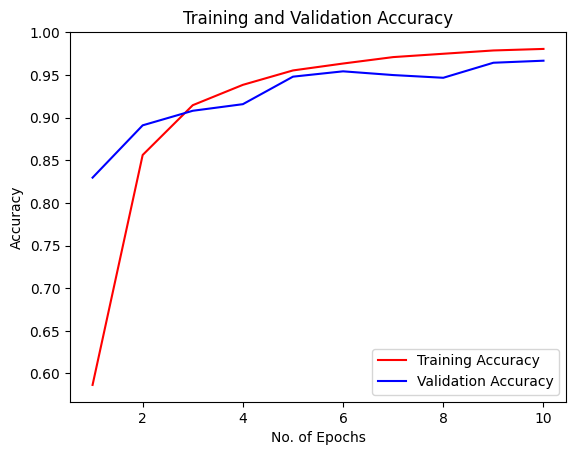

In [29]:
num_epochs = len(training_history.history['accuracy'])
epochs = range(1, num_epochs + 1)

# Plot training and validation accuracy
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [30]:
class_name = validation_set.class_names

In [31]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [32]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 287s 16ms/step


In [33]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [34]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [35]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [37]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.97      0.97       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.97      0.97      0.97       440
                                   Apple___healthy       0.98      0.96      0.97       502
                               Blueberry___healthy       0.93      0.99      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.86      0.98      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.89      0.

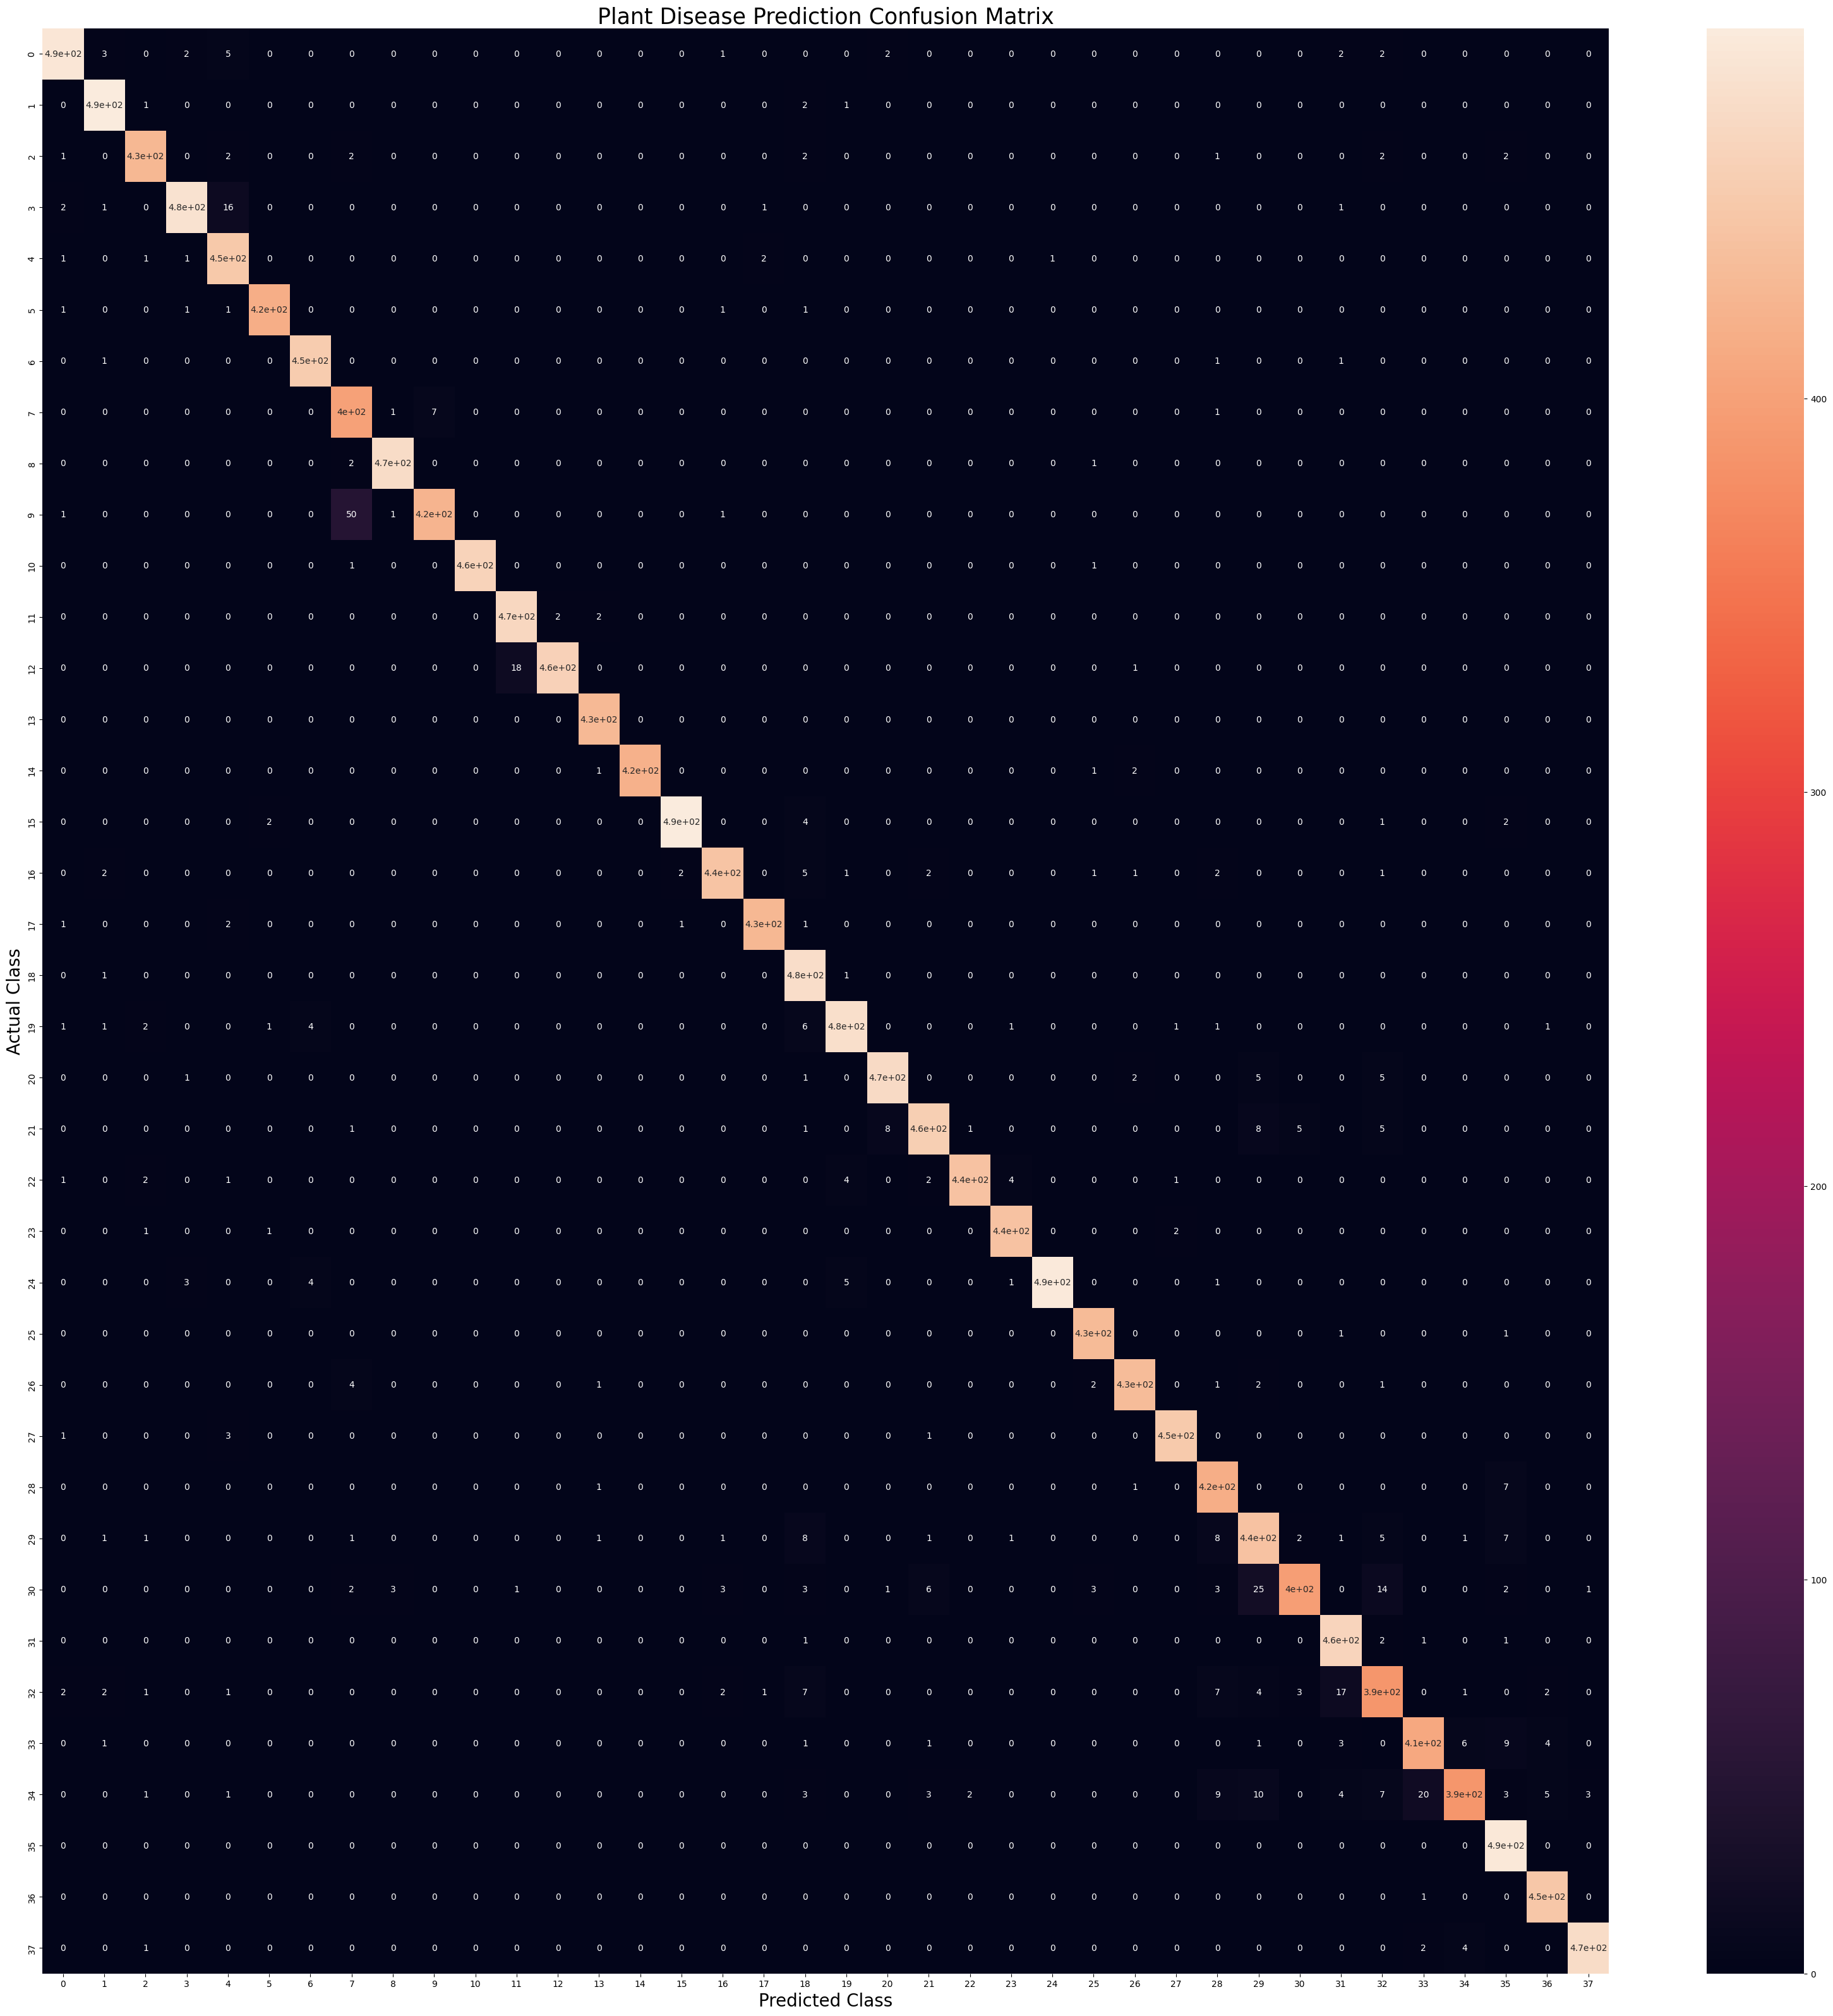

In [38]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()